In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vuelos.csv")

**Integrantes : André Fernández, Angelo Zurita, Darwin Pacheco**

Utilizando todo lo que ha aprendido hasta este momento en la materia, conteste las siguientes preguntas.   

Parte 1:
1. Qué aerolínea ha sido la que más pasajeros tuvo en 2023?

2. Cúal es el Ticket Promedio del boleto en la clase Economy  

3. Cuales son las 3 aerolíneas con el Ticket Promedio más bajo en la clase Business 

4. Cada miembro del equipo debe formular una pregunta de negocio sobre la data. Y contestar la pregunta. 

Parte 2:    

5. Impute los valores nulos de este dataframe. (En este ejercicio no está permitido eliminarlos)  

6. Se desea entrenar un modelo de Clustering con este dataset. Para ello es necesario seleccionar las variables a utilizar. Si deseamos considerar las variables categóricas: clase, genero, tipo de pago y aerolínea dentro del modelo.  Qué métodos de codificación utilizaría en cada una de estas variables? (Solo escríba el método y justifique brevemente su respuesta)


Bonus:    

7. implemente los métodos que propuso en la pregunta 5. 

### PARTE 1

In [3]:
df

identificacionPasajero  ID vuelo asiento     clase  Precio_boleto  \
0                       178527       176     10F   Economy            NaN   
1                        60548       134     36F   Economy     156.250305   
2                       124289       336      9D   Premium     243.827387   
3                       125115       429     15D   Economy     385.355754   
4                        39485       518     17B   Economy     129.551739   
...                        ...       ...     ...       ...            ...   
133282                     378       717      8A   Economy     292.568470   
133283                   48402        70     23E  Business      77.327654   
133284                   67343       372     33C   Premium     107.389897   
133285                  195358       212     42A  Business     300.507295   
133286                   76837       737      1D   Economy     234.029325   

       fecha_compra genero        tipo_pago fecha_vuelo     aerolinea origin  \
0        2022-10-10      M  Tarjeta Credito  2023-03-21   Aerolinea_1    MIA   
1        2022-11-29      F  Tarjeta Credito  2023-03-02   Aerolinea_3    CUE   
2        2023-01-09      F  Tarjeta Credito  2023-06-02   Aerolinea_5    MIA   
3        2023-01-29      F  Tarjeta Credito  2023-07-14  Aerolinea_10    CUE   
4        2023-06-03      M  Tarjeta Credito  2023-08-24   Aerolinea_8    UIO   
...             ...    ...              ...         ...           ...    ...   
133282   2023-06-10      M  Tarjeta Credito  2023-11-23   Aerolinea_8    UIO   
133283   2023-01-11      M     Canje Millas  2023-02-01   Aerolinea_8    CUE   
133284   2023-06-13      M  Tarjeta Credito  2023-06-19   Aerolinea_8    UIO   
133285   2023-03-23      F  Tarjeta Credito  2023-04-07   Aerolinea_6    JFK   
133286   2023-08-27      F   Tarjeta Debito  2023-12-02   Aerolinea_9    MIA   

       dest  dep_delay  
0       MAD       43.0  
1       MIA       44.0  
2       MAD       13.0  
3       MAD        1.0  
4       JFK       42.0  
...     ...        ...  
133282  MIA       10.0  
133283  MIA       46.0  
133284  MAD        3.0  
133285  MIA       36.0  
133286  MAD       27.0  

[133287 rows x 13 columns]

In [4]:
df['Año_vuelo'] = pd.to_datetime(df['fecha_vuelo']).dt.year
df

identificacionPasajero  ID vuelo asiento     clase  Precio_boleto  \
0                       178527       176     10F   Economy            NaN   
1                        60548       134     36F   Economy     156.250305   
2                       124289       336      9D   Premium     243.827387   
3                       125115       429     15D   Economy     385.355754   
4                        39485       518     17B   Economy     129.551739   
...                        ...       ...     ...       ...            ...   
133282                     378       717      8A   Economy     292.568470   
133283                   48402        70     23E  Business      77.327654   
133284                   67343       372     33C   Premium     107.389897   
133285                  195358       212     42A  Business     300.507295   
133286                   76837       737      1D   Economy     234.029325   

       fecha_compra genero        tipo_pago fecha_vuelo     aerolinea origin  \
0        2022-10-10      M  Tarjeta Credito  2023-03-21   Aerolinea_1    MIA   
1        2022-11-29      F  Tarjeta Credito  2023-03-02   Aerolinea_3    CUE   
2        2023-01-09      F  Tarjeta Credito  2023-06-02   Aerolinea_5    MIA   
3        2023-01-29      F  Tarjeta Credito  2023-07-14  Aerolinea_10    CUE   
4        2023-06-03      M  Tarjeta Credito  2023-08-24   Aerolinea_8    UIO   
...             ...    ...              ...         ...           ...    ...   
133282   2023-06-10      M  Tarjeta Credito  2023-11-23   Aerolinea_8    UIO   
133283   2023-01-11      M     Canje Millas  2023-02-01   Aerolinea_8    CUE   
133284   2023-06-13      M  Tarjeta Credito  2023-06-19   Aerolinea_8    UIO   
133285   2023-03-23      F  Tarjeta Credito  2023-04-07   Aerolinea_6    JFK   
133286   2023-08-27      F   Tarjeta Debito  2023-12-02   Aerolinea_9    MIA   

       dest  dep_delay  Año_vuelo  
0       MAD       43.0       2023  
1       MIA       44.0       2023  
2       MAD       13.0       2023  
3       MAD        1.0       2023  
4       JFK       42.0       2023  
...     ...        ...        ...  
133282  MIA       10.0       2023  
133283  MIA       46.0       2023  
133284  MAD        3.0       2023  
133285  MIA       36.0       2023  
133286  MAD       27.0       2023  

[133287 rows x 14 columns]

In [5]:
df_2023 = df[df['Año_vuelo'] == 2023]
process = df_2023.groupby('aerolinea')['identificacionPasajero'].count()
aerolinea = process.idxmax()
cantidadd = process.max()
print(f"La aerolinea con mas vuelos en 2023 es {aerolinea} con {cantidadd} vuelos")

La aerolinea con mas vuelos en 2023 es Aerolinea_8 con 15377 vuelos


In [6]:
df_economy = df[(df['clase'] == 'Economy')]
df_economy

identificacionPasajero  ID vuelo asiento    clase  Precio_boleto  \
0                       178527       176     10F  Economy            NaN   
1                        60548       134     36F  Economy     156.250305   
3                       125115       429     15D  Economy     385.355754   
4                        39485       518     17B  Economy     129.551739   
6                         2792       604     11F  Economy     299.692925   
...                        ...       ...     ...      ...            ...   
133277                   89842       273     31A  Economy     507.254130   
133278                  121608       306      9C  Economy     220.175800   
133279                  187918       382     43B  Economy     154.126919   
133282                     378       717      8A  Economy     292.568470   
133286                   76837       737      1D  Economy     234.029325   

       fecha_compra genero        tipo_pago fecha_vuelo     aerolinea origin  \
0        2022-10-10      M  Tarjeta Credito  2023-03-21   Aerolinea_1    MIA   
1        2022-11-29      F  Tarjeta Credito  2023-03-02   Aerolinea_3    CUE   
3        2023-01-29      F  Tarjeta Credito  2023-07-14  Aerolinea_10    CUE   
4        2023-06-03      M  Tarjeta Credito  2023-08-24   Aerolinea_8    UIO   
6        2023-04-27      M  Tarjeta Credito  2023-10-02   Aerolinea_4    CUE   
...             ...    ...              ...         ...           ...    ...   
133277   2023-04-20      F  Tarjeta Credito  2023-05-04   Aerolinea_6    UIO   
133278   2023-05-04      F   Tarjeta Debito  2023-05-19   Aerolinea_4    UIO   
133279   2022-12-28      M         Efectivo  2023-06-23   Aerolinea_9    MIA   
133282   2023-06-10      M  Tarjeta Credito  2023-11-23   Aerolinea_8    UIO   
133286   2023-08-27      F   Tarjeta Debito  2023-12-02   Aerolinea_9    MIA   

       dest  dep_delay  Año_vuelo  
0       MAD       43.0       2023  
1       MIA       44.0       2023  
3       MAD        1.0       2023  
4       JFK       42.0       2023  
6       SCL      -17.0       2023  
...     ...        ...        ...  
133277  MIA        7.0       2023  
133278  SCL       42.0       2023  
133279  SCL      -15.0       2023  
133282  MIA       10.0       2023  
133286  MAD       27.0       2023  

[93252 rows x 14 columns]

In [7]:
import pandas as pd
import plotly.express as px
px.box(x=df_economy['Precio_boleto'])

In [8]:
Q1 = df_economy['Precio_boleto'].quantile(0.25)
Q3 = df_economy['Precio_boleto'].quantile(0.75)
RIQ = Q3 - Q1
df_economy_notOutliers = df_economy[(df_economy['Precio_boleto'] >= (Q1 - 1.5 * RIQ)) & (df_economy['Precio_boleto'] <= (Q3 + 1.5 * RIQ))]
promedio_precio = df_economy_notOutliers['Precio_boleto'].mean()
print(f"El precio promedio de los boletos en clase Economy es: {promedio_precio:.2f}")

El precio promedio de los boletos en clase Economy es: 218.91


In [9]:
px.box(x=df_economy_notOutliers['Precio_boleto'])

In [10]:
df_bussines = df[(df['clase'] == 'Business') & (df['Precio_boleto'].notnull())]
df_bussines

identificacionPasajero  ID vuelo asiento     clase  Precio_boleto  \
17                       66949       174      9D  Business     511.688540   
20                      147683        32     46C  Business     216.407039   
22                       20307       311     13B  Business     612.161208   
58                      198879       791     43F  Business     476.419618   
69                       59882       626     18F  Business     433.093876   
...                        ...       ...     ...       ...            ...   
133223                  147627        32      4A  Business     238.992797   
133241                  167544       337     26F  Business     402.802658   
133272                   17655       293     13A  Business     595.456941   
133283                   48402        70     23E  Business      77.327654   
133285                  195358       212     42A  Business     300.507295   

       fecha_compra genero        tipo_pago fecha_vuelo     aerolinea origin  \
17       2022-10-12      M  Tarjeta Credito  2023-03-20  Aerolinea_10    UIO   
20       2022-09-22      F  Tarjeta Credito  2023-01-15   Aerolinea_8    JFK   
22       2023-05-13      M  Tarjeta Credito  2023-05-22   Aerolinea_4    MIA   
58       2023-07-15      F  Tarjeta Credito  2023-12-26   Aerolinea_1    MIA   
69       2023-05-13      F  Tarjeta Credito  2023-10-12   Aerolinea_8    GYE   
...             ...    ...              ...         ...           ...    ...   
133223   2022-10-03      M         Efectivo  2023-01-15   Aerolinea_8    JFK   
133241   2023-03-17      M  Tarjeta Credito  2023-06-03   Aerolinea_4    GYE   
133272   2023-01-07      M  Tarjeta Credito  2023-05-14   Aerolinea_5    UIO   
133283   2023-01-11      M     Canje Millas  2023-02-01   Aerolinea_8    CUE   
133285   2023-03-23      F  Tarjeta Credito  2023-04-07   Aerolinea_6    JFK   

       dest  dep_delay  Año_vuelo  
17      MAD      -32.0       2023  
20      MIA      -16.0       2023  
22      BOG       30.0       2023  
58      SCL       32.0       2023  
69      BOG       38.0       2023  
...     ...        ...        ...  
133223  MIA      -16.0       2023  
133241  SCL       27.0       2023  
133272  BOG       10.0       2023  
133283  MIA       46.0       2023  
133285  MIA       36.0       2023  

[10644 rows x 14 columns]

In [11]:
px.box(x=df_bussines['Precio_boleto'])

In [12]:
Q1 = df_bussines['Precio_boleto'].quantile(0.25)
Q3 = df_bussines['Precio_boleto'].quantile(0.75)
RIQ = Q3 - Q1
df_business_notOutliers = df_bussines[(df_bussines['Precio_boleto'] >= (Q1 - 1.5 * RIQ)) & (df_bussines['Precio_boleto'] <= (Q3 + 1.5 * RIQ))]

In [13]:
px.box(x=df_business_notOutliers['Precio_boleto'])

In [14]:
grouped2 = df_business_notOutliers.groupby('aerolinea')['Precio_boleto'].mean().sort_values(ascending=False)
top3 = grouped2.head(3)
print("Las 3 aerolineas con los precios promedio de boletos mas altos en clase Business son:")
for aerolinea, precio in top3.items():
    print(f"{aerolinea}: {precio:.2f}")

Las 3 aerolineas con los precios promedio de boletos mas altos en clase Business son:
Aerolinea_10: 398.42
Aerolinea_3: 392.93
Aerolinea_5: 361.13


In [15]:
# Cuanto es el tiempo de demora promedio por aerolinea? (Angelo Zurita)
px.box(x=df['dep_delay'])

In [16]:
print("El tiempo de demora promedio por aerolinea es:")
for aerolinea, delay in df.groupby('aerolinea')['dep_delay'].mean().items():
    print(f"{aerolinea}: {delay:.2f} minutos")

El tiempo de demora promedio por aerolinea es:
Aerolinea_1: 7.31 minutos
Aerolinea_10: 0.87 minutos
Aerolinea_2: 1.88 minutos
Aerolinea_3: 10.78 minutos
Aerolinea_4: 7.95 minutos
Aerolinea_5: 6.37 minutos
Aerolinea_6: 7.97 minutos
Aerolinea_7: 4.57 minutos
Aerolinea_8: 10.59 minutos
Aerolinea_9: 7.45 minutos


In [17]:
# Cual es la distribución de tipo pago de los boletos por cada clase? (Darwin Pacheco)
df_tipoPagoxClase = df.groupby(['clase', 'tipo_pago']).size().reset_index(name='cantidad')
df_tipoPagoxClase

clase        tipo_pago  cantidad
0   Business     Canje Millas       554
1   Business         Efectivo      1615
2   Business  Tarjeta Credito      6829
3   Business   Tarjeta Debito      1646
4    Economy     Canje Millas      4633
5    Economy         Efectivo     13914
6    Economy  Tarjeta Credito     60589
7    Economy   Tarjeta Debito     14116
8      First     Canje Millas       145
9      First         Efectivo       423
10     First  Tarjeta Credito      1732
11     First   Tarjeta Debito       379
12   Premium     Canje Millas      1358
13   Premium         Efectivo      4032
14   Premium  Tarjeta Credito     17334
15   Premium   Tarjeta Debito      3988

In [18]:
px.bar(df_tipoPagoxClase, x='clase', y='cantidad', color='tipo_pago', barmode='group', title='Distribución de tipo de pago por clase de boleto')

In [19]:
px.bar(df_tipoPagoxClase[df_tipoPagoxClase['clase']=='Business'], x='clase', y='cantidad', color='tipo_pago', barmode='group', title='Distribución de tipo de pago en Business')

In [20]:
px.bar(df_tipoPagoxClase[df_tipoPagoxClase['clase']=='Economy'], x='clase', y='cantidad', color='tipo_pago', barmode='group', title='Distribución de tipo de pago en Economy')

In [21]:
px.bar(df_tipoPagoxClase[df_tipoPagoxClase['clase']=='Premium'], x='clase', y='cantidad', color='tipo_pago', barmode='group', title='Distribución de tipo de pago en Premium')

In [22]:
px.bar(df_tipoPagoxClase[df_tipoPagoxClase['clase']=='First'], x='clase', y='cantidad', color='tipo_pago', barmode='group', title='Distribución de tipo de pago en First')

In [23]:
# Promedio de vuelos por dia de semana (André Fernández)
df['dia_semana'] = pd.to_datetime(df['fecha_vuelo']).dt.day_name()


In [24]:
grouped3 = df.groupby('dia_semana')['identificacionPasajero'].count().sort_values(ascending=False)
total_vuelos = df['identificacionPasajero'].count()
print("Promedio de vuelos por dia de semana:")
for dia, cantidad in grouped3.items():
    porcentaje = (cantidad / total_vuelos) * 100
    print(f"{dia}: {cantidad} vuelos ({porcentaje:.2f}%)")

Promedio de vuelos por dia de semana:
Sunday: 19986 vuelos (14.99%)
Friday: 19741 vuelos (14.81%)
Thursday: 19528 vuelos (14.65%)
Wednesday: 19113 vuelos (14.34%)
Tuesday: 18777 vuelos (14.09%)
Saturday: 18288 vuelos (13.72%)
Monday: 17854 vuelos (13.40%)


Utilizando todo lo que ha aprendido hasta este momento en la materia, conteste las siguientes preguntas.   

Parte 1:
1. Qué aerolínea ha sido la que más pasajeros tuvo en 2023?

2. Cúal es el Ticket Promedio del boleto en la clase Economy  

3. Cuales son las 3 aerolíneas con el Ticket Promedio más bajo en la clase Business 

4. Cada miembro del equipo debe formular una pregunta de negocio sobre la data. Y contestar la pregunta. 

Parte 2:    

5. Impute los valores nulos de este dataframe. (En este ejercicio no está permitido eliminarlos)  

6. Se desea entrenar un modelo de Clustering con este dataset. Para ello es necesario seleccionar las variables a utilizar. Si deseamos considerar las variables categóricas: clase, genero, tipo de pago y aerolínea dentro del modelo.  Qué métodos de codificación utilizaría en cada una de estas variables? (Solo escríba el método y justifique brevemente su respuesta)


Bonus:    

7. implemente los métodos que propuso en la pregunta 5. 

### Parte 2

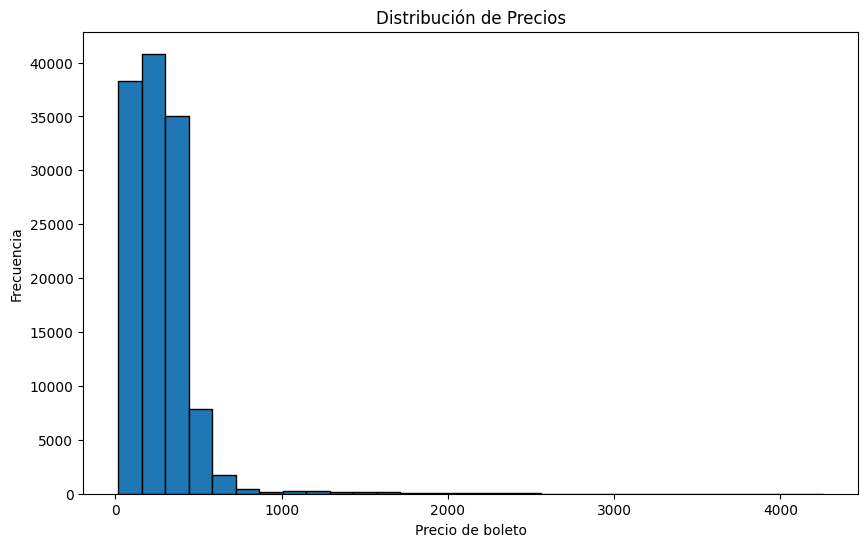

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Precio_boleto'].dropna(), bins=30, edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio de boleto')
plt.ylabel('Frecuencia')
plt.show()

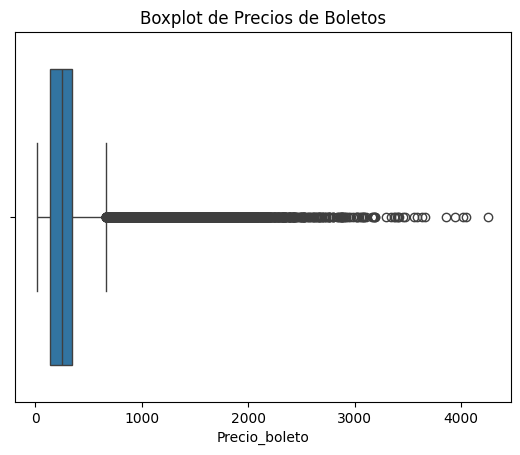

In [26]:
sns.boxplot(x=df['Precio_boleto'])
plt.title('Boxplot de Precios de Boletos')
plt.show()

In [27]:
Q1 = df["Precio_boleto"].quantile(0.25)
Q3 = df["Precio_boleto"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}, Límite superior: {limite_superior}")

Q1: 134.71078306075057, Q3: 346.9591062136169, IQR: 212.24832315286633
Límite inferior: -183.66170166854894, Límite superior: 665.3315909429164


In [28]:
outliers = (df['Precio_boleto'] < limite_inferior) | (df['Precio_boleto'] > limite_superior)
print(f"Cantidad de outliers en Precio_boleto: {outliers.sum()}")

Cantidad de outliers en Precio_boleto: 2486


In [29]:
precio_promedio = df.loc[~outliers, 'Precio_boleto'].mean()
df.loc[outliers, 'Precio_boleto'] = precio_promedio
df

identificacionPasajero  ID vuelo asiento     clase  Precio_boleto  \
0                       178527       176     10F   Economy            NaN   
1                        60548       134     36F   Economy     156.250305   
2                       124289       336      9D   Premium     243.827387   
3                       125115       429     15D   Economy     385.355754   
4                        39485       518     17B   Economy     129.551739   
...                        ...       ...     ...       ...            ...   
133282                     378       717      8A   Economy     292.568470   
133283                   48402        70     23E  Business      77.327654   
133284                   67343       372     33C   Premium     107.389897   
133285                  195358       212     42A  Business     300.507295   
133286                   76837       737      1D   Economy     234.029325   

       fecha_compra genero        tipo_pago fecha_vuelo     aerolinea origin  \
0        2022-10-10      M  Tarjeta Credito  2023-03-21   Aerolinea_1    MIA   
1        2022-11-29      F  Tarjeta Credito  2023-03-02   Aerolinea_3    CUE   
2        2023-01-09      F  Tarjeta Credito  2023-06-02   Aerolinea_5    MIA   
3        2023-01-29      F  Tarjeta Credito  2023-07-14  Aerolinea_10    CUE   
4        2023-06-03      M  Tarjeta Credito  2023-08-24   Aerolinea_8    UIO   
...             ...    ...              ...         ...           ...    ...   
133282   2023-06-10      M  Tarjeta Credito  2023-11-23   Aerolinea_8    UIO   
133283   2023-01-11      M     Canje Millas  2023-02-01   Aerolinea_8    CUE   
133284   2023-06-13      M  Tarjeta Credito  2023-06-19   Aerolinea_8    UIO   
133285   2023-03-23      F  Tarjeta Credito  2023-04-07   Aerolinea_6    JFK   
133286   2023-08-27      F   Tarjeta Debito  2023-12-02   Aerolinea_9    MIA   

       dest  dep_delay  Año_vuelo dia_semana  
0       MAD       43.0       2023    Tuesday  
1       MIA       44.0       2023   Thursday  
2       MAD       13.0       2023     Friday  
3       MAD        1.0       2023     Friday  
4       JFK       42.0       2023   Thursday  
...     ...        ...        ...        ...  
133282  MIA       10.0       2023   Thursday  
133283  MIA       46.0       2023  Wednesday  
133284  MAD        3.0       2023     Monday  
133285  MIA       36.0       2023     Friday  
133286  MAD       27.0       2023   Saturday  

[133287 rows x 15 columns]

**Justificación**  
Se empleó el método IQR porque es resistente a los valores atípicos y no requiere que los datos sigan una distribución normal.

In [30]:
df.isnull().sum()

identificacionPasajero       0
ID vuelo                     0
asiento                      0
clase                        0
Precio_boleto             7421
fecha_compra                 0
genero                       0
tipo_pago                    0
fecha_vuelo                  0
aerolinea                    0
origin                       0
dest                         0
dep_delay                    0
Año_vuelo                    0
dia_semana                   0
dtype: int64

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\1120331682.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Figure size 1200x800 with 0 Axes>

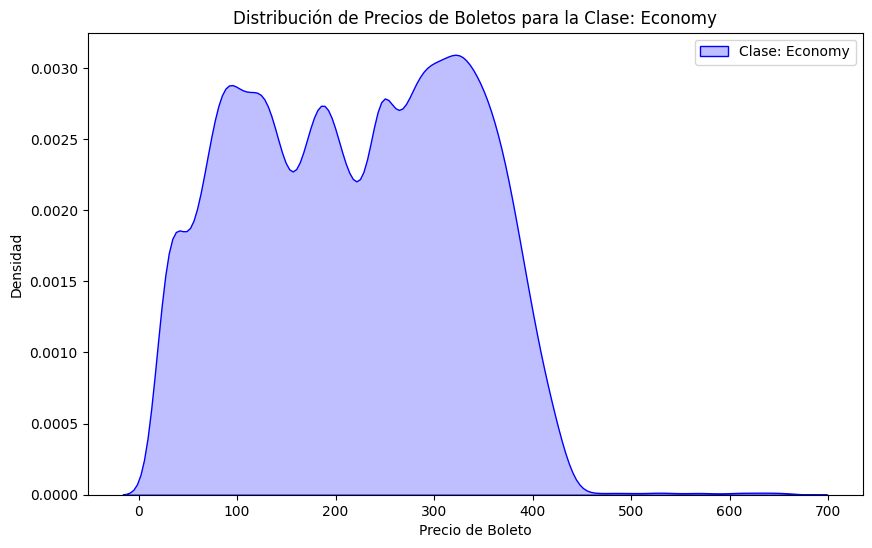

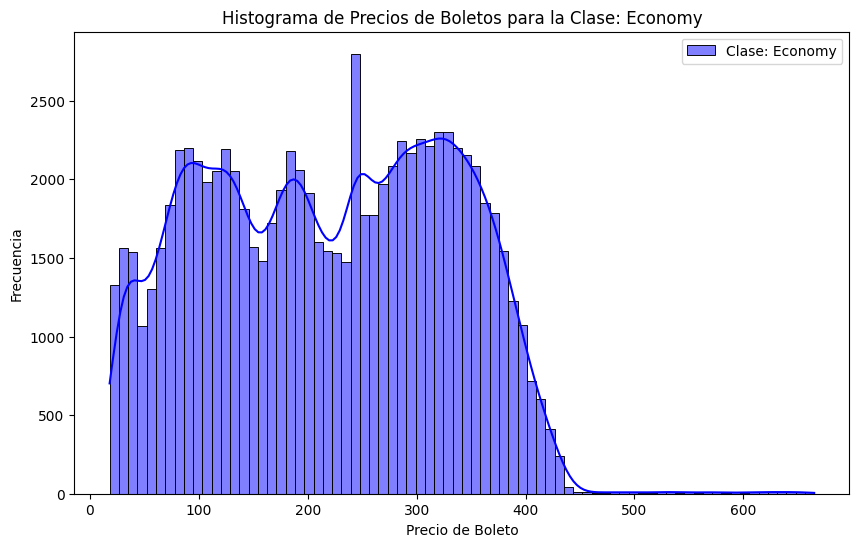

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\1120331682.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




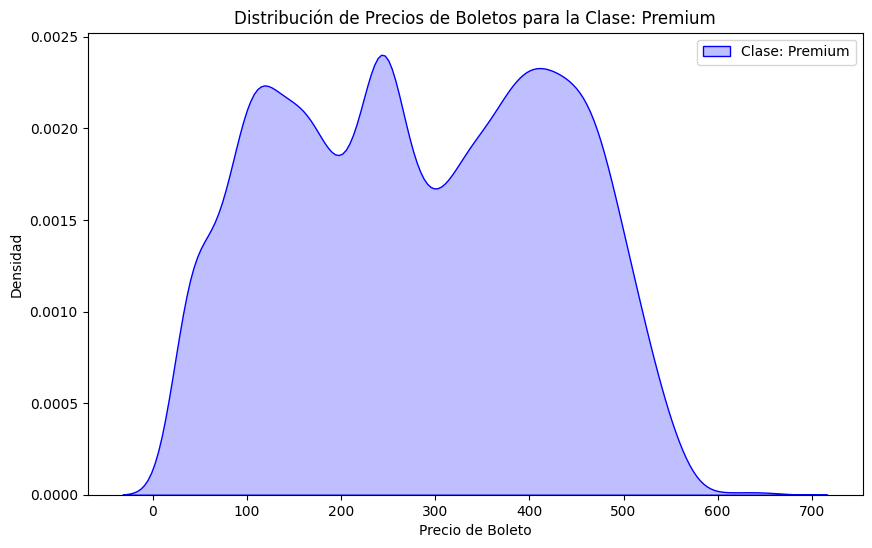

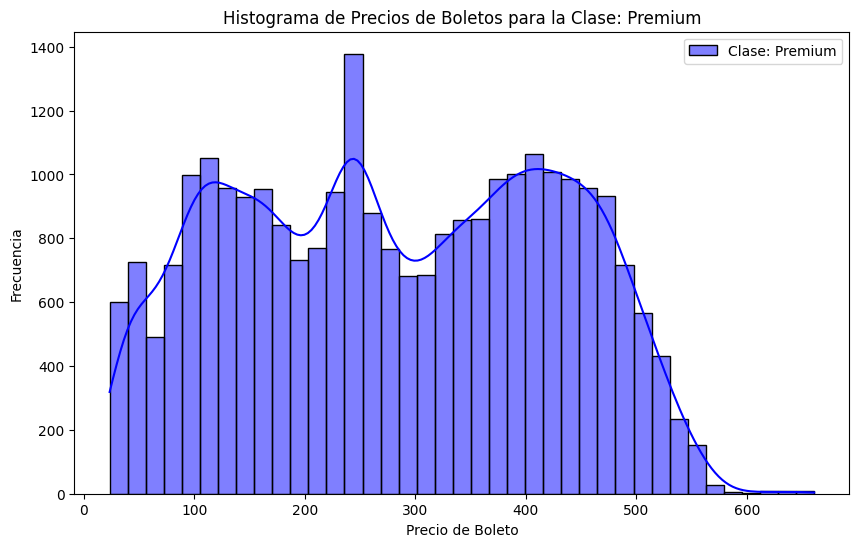

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\1120331682.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




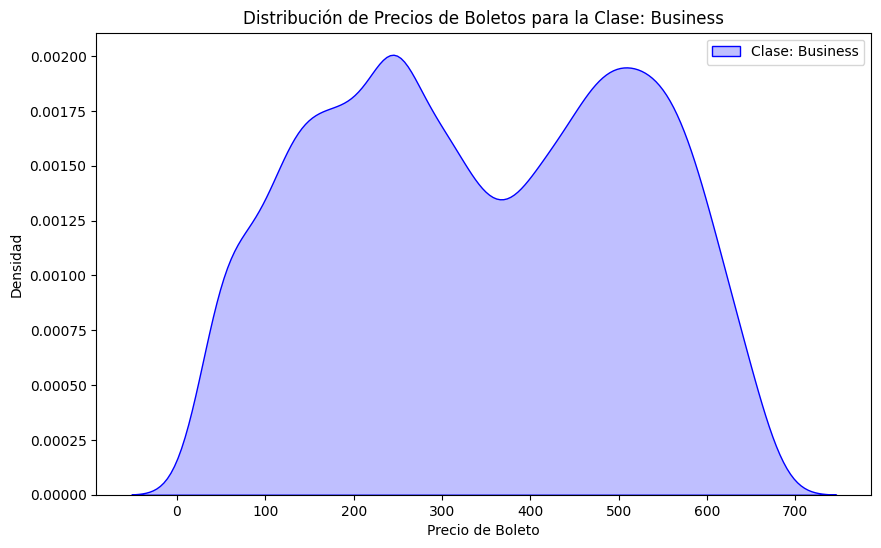

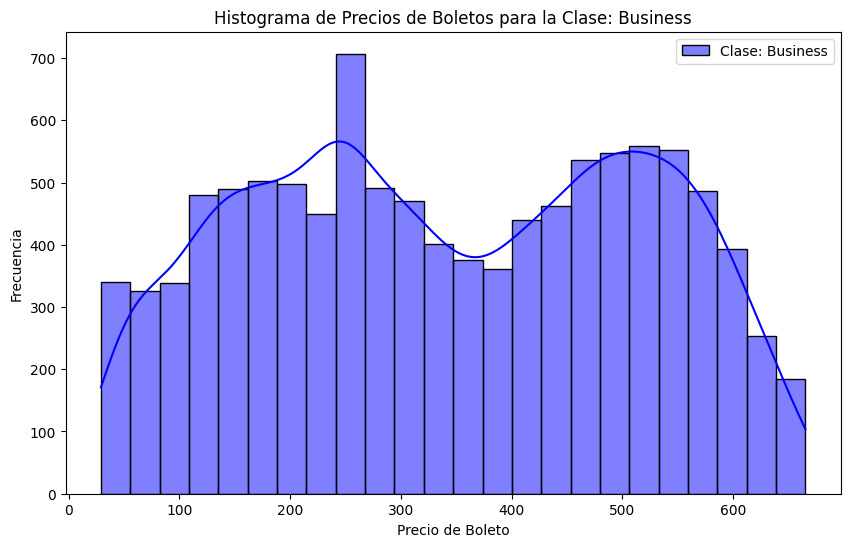

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\1120331682.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




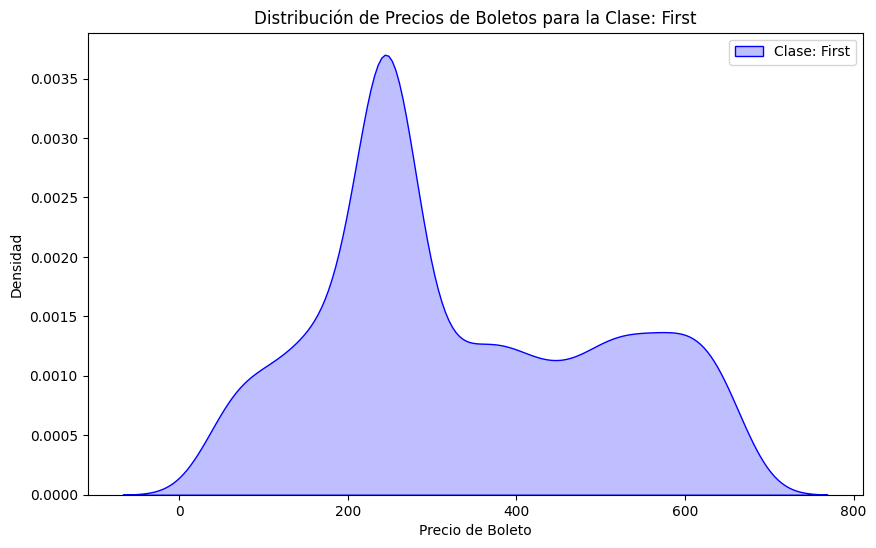

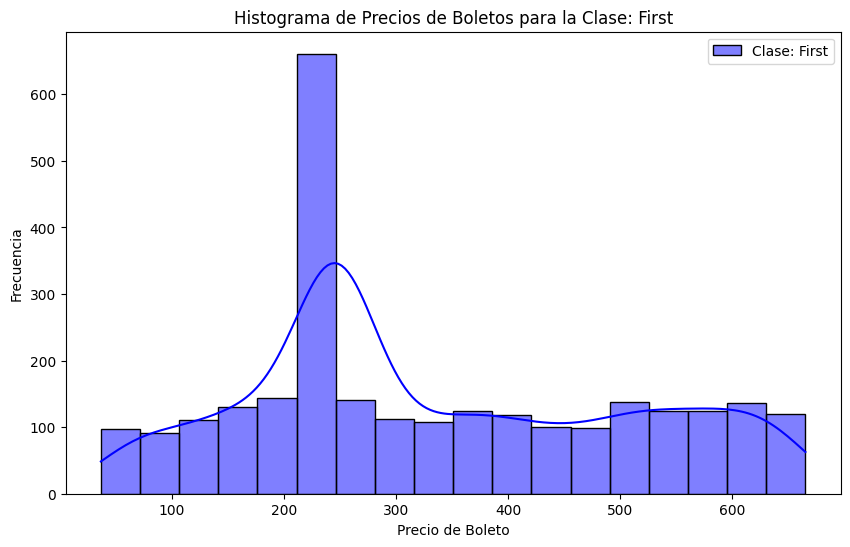

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\1120331682.py:40: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



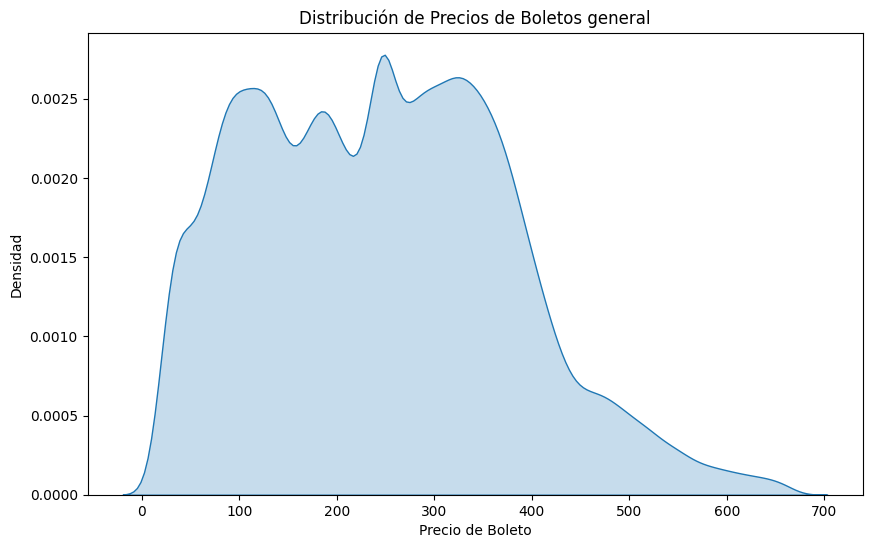

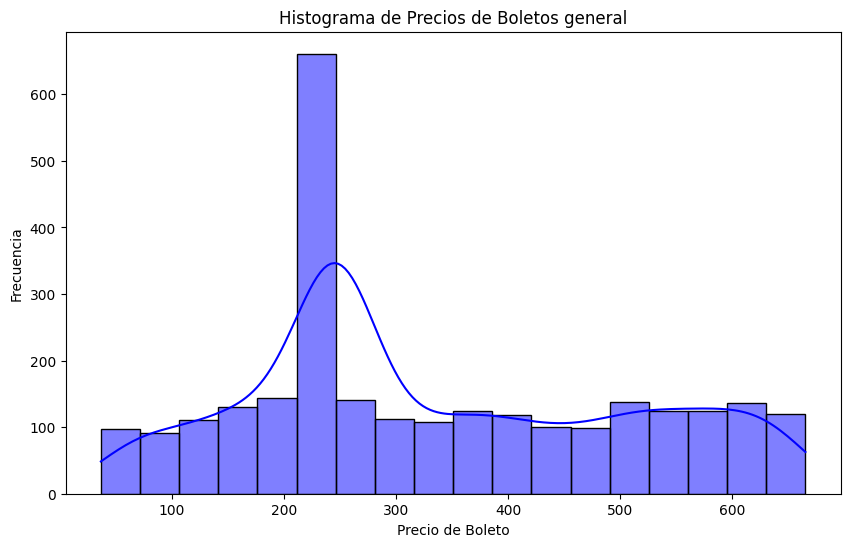

In [31]:
# Crear una lista de las clases únicas
clases_unicas = df['clase'].unique()

# Configurar la visualización
plt.figure(figsize=(12, 8))

# Loop para crear un gráfico para cada clase
for clase in clases_unicas:
    plt.figure(figsize=(10, 6))
    
    # Filtrar los datos para la clase específica
    df_clase = df[df['clase'] == clase]
    
    # Crear un gráfico de densidad para cada clase
    sns.kdeplot(df_clase['Precio_boleto'], shade=True, label=f'Clase: {clase}', color='blue')
    
    # Títulos y etiquetas
    plt.title(f'Distribución de Precios de Boletos para la Clase: {clase}')
    plt.xlabel('Precio de Boleto')
    plt.ylabel('Densidad')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

    # Alternativa: Histograma por clase
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clase['Precio_boleto'], kde=True, color='blue', label=f'Clase: {clase}')
    
    # Títulos y etiquetas
    plt.title(f'Histograma de Precios de Boletos para la Clase: {clase}')
    plt.xlabel('Precio de Boleto')
    plt.ylabel('Frecuencia')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Precio_boleto', fill=True, common_norm=False, palette="crest")
plt.title(f'Distribución de Precios de Boletos general')
plt.xlabel('Precio de Boleto')
plt.ylabel('Densidad')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_clase['Precio_boleto'], kde=True, color='blue')
plt.title(f'Histograma de Precios de Boletos general')
plt.xlabel('Precio de Boleto')
plt.ylabel('Frecuencia')
plt.show()


In [32]:
ratios = {}
for clase in clases_unicas:
    # Filtrar los datos para la clase específica
    df_clase = df[df['clase'] == clase]
    
    # Calcular la media y desviación estándar
    media = df_clase['Precio_boleto'].mean()
    desviacion = df_clase['Precio_boleto'].std()
    
    # Calcular el ratio media/desviación estándar
    if desviacion != 0:  # Para evitar división por cero
        ratio_media_desviacion = media / desviacion
    else:
        ratio_media_desviacion = None  # Si la desviación estándar es cero
    
    # Almacenar el ratio en un diccionario
    ratios[clase] = ratio_media_desviacion

# Mostrar los resultados de los ratios
print("Ratio Media / Desviación Estándar por Clase:")
for clase, ratio in ratios.items():
    print(f"Clase: {clase} -> Ratio: {ratio:.2f}")


Ratio Media / Desviación Estándar por Clase:
Clase: Economy -> Ratio: 1.99
Clase: Premium -> Ratio: 1.98
Clase: Business -> Ratio: 2.00
Clase: First -> Ratio: 2.00


In [33]:
clases_unicas = clases_unicas[clases_unicas != 'First']
for clase in clases_unicas:
    # Calcular la mediana para cada clase
    mediana = df[df['clase'] == clase]['Precio_boleto'].median()
    print(f"Mediana de Precio_boleto para la clase {clase}: {mediana}")

    # Imputar la mediana en los valores nulos de Precio_boleto
    df.loc[(df['clase'] == clase) & (df['Precio_boleto'].isnull()), 'Precio_boleto'] = mediana

# Imputar la moda para la clase 'First'
moda_first = df[df['clase'] == 'First']['Precio_boleto'].mode()[0]
print(f"Moda de Precio_boleto para la clase First: {moda_first}")
# Imputar la moda en los valores nulos de Precio_boleto para la clase 'First'
df.loc[(df['clase'] == 'First') & (df['Precio_boleto'].isnull()), 'Precio_boleto'] = moda_first

Mediana de Precio_boleto para la clase Economy: 223.10158609115973
Mediana de Precio_boleto para la clase Premium: 277.00778689847004
Mediana de Precio_boleto para la clase Business: 334.05211962023577
Moda de Precio_boleto para la clase First: 245.78366929714795


In [34]:
df['Precio_boleto'].isnull().sum()  # Verificar si quedan valores nulos

np.int64(0)

**Justificación:**

Gracias al Ratio Media / Desviación Estándar por Clase y los gráficos generados, se puede concluir que la media no es la mejor opción para imputar los valores nulos, ya que los datos no siguen una distribución normal. Esto se confirma por la alta dispersión de los precios, especialmente en las clases con un ratio alto, lo que indica la presencia de valores atípicos.

Por lo tanto, se optará por usar la mediana para imputar los valores nulos en la mayoría de las clases, ya que la mediana es más robusta frente a la dispersión y a la falta de normalidad en los datos.

Sin embargo, para la clase First, se utilizará la moda. Esto se debe a que, como se observa en los gráficos, existe un valor que se repite con mucha frecuencia, lo que hace que la moda sea una opción adecuada para imputar los valores nulos en esta clase.

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\4214372579.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Figure size 1200x800 with 0 Axes>

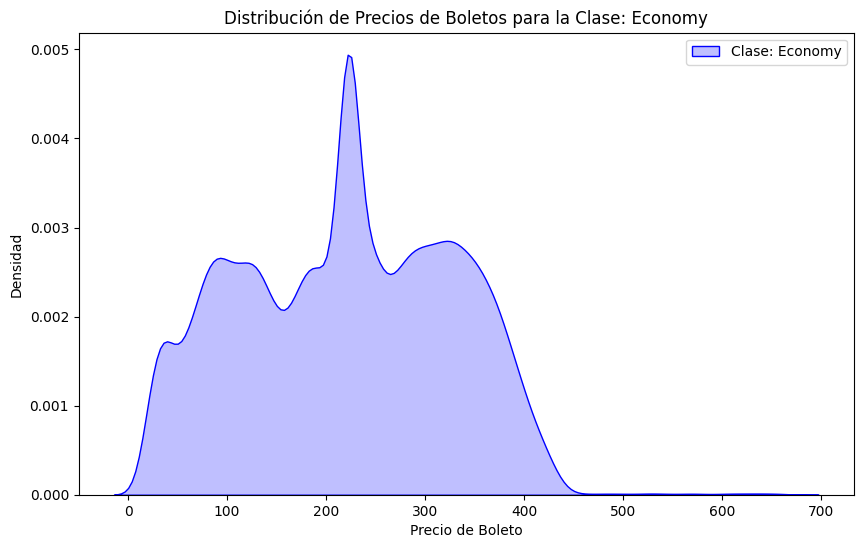

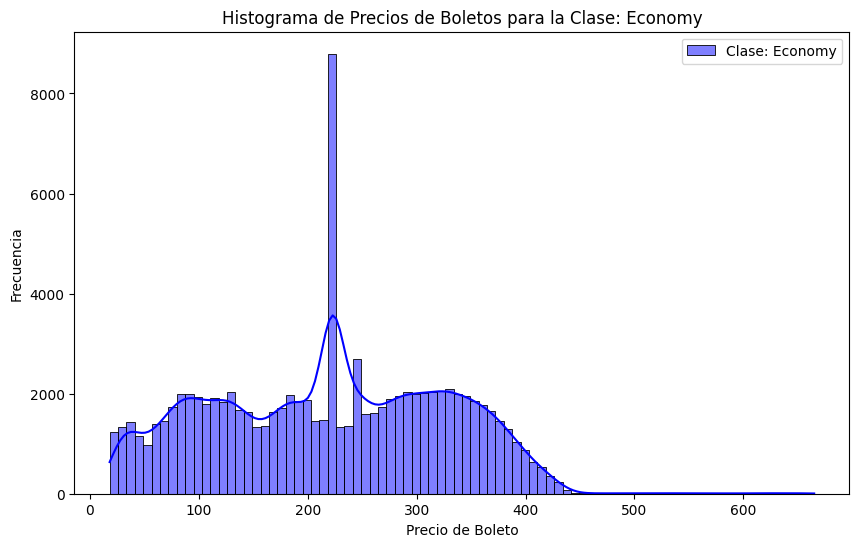

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\4214372579.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




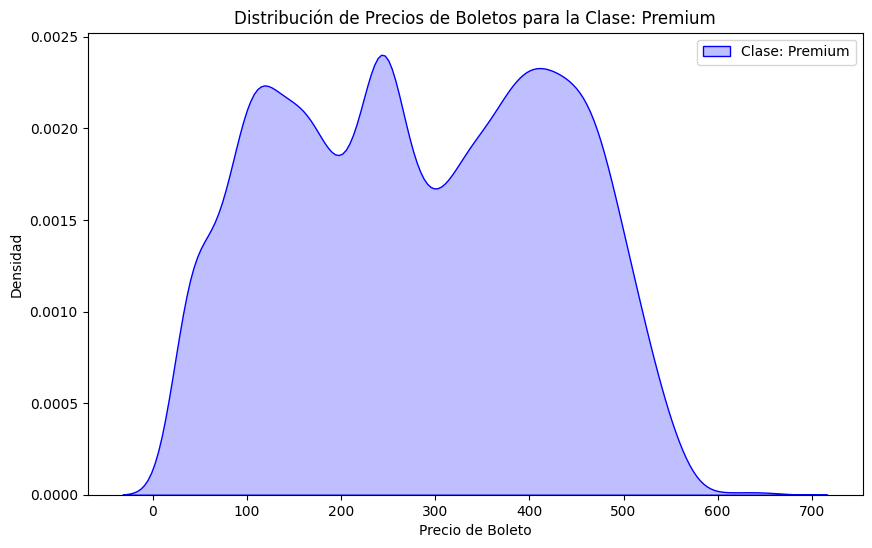

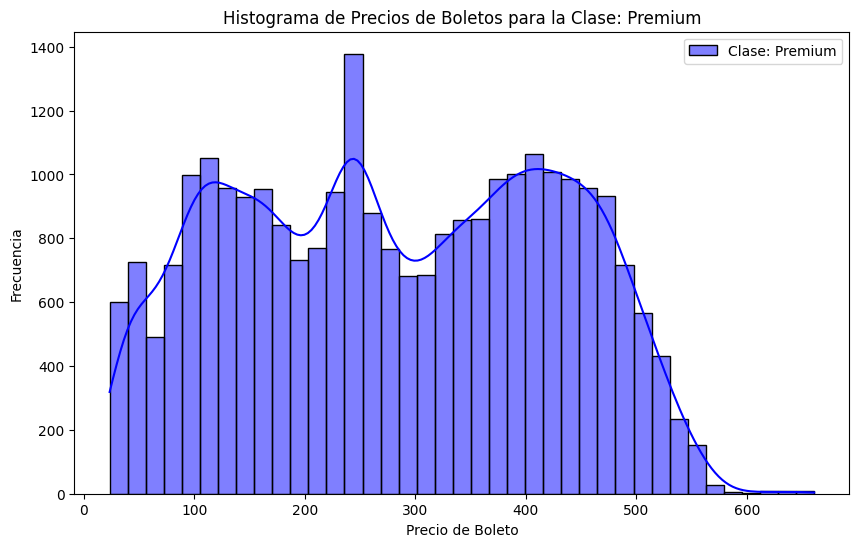

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\4214372579.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




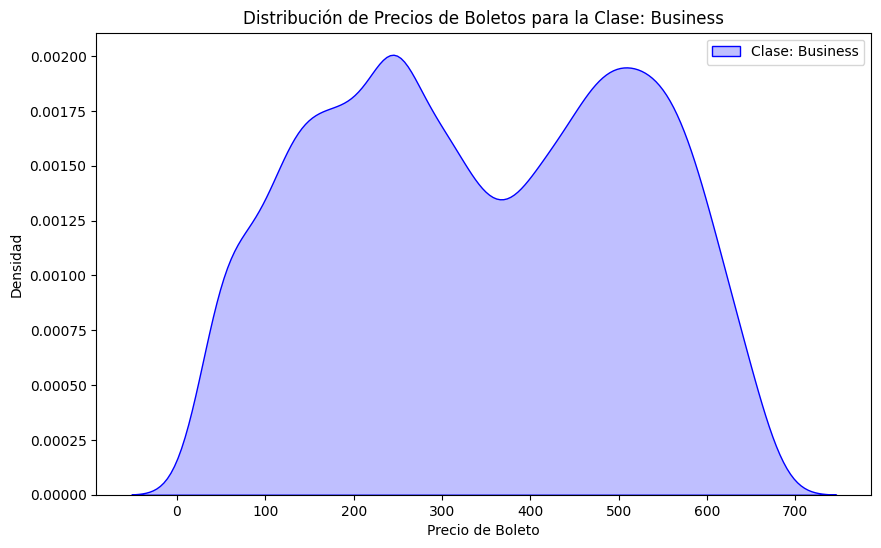

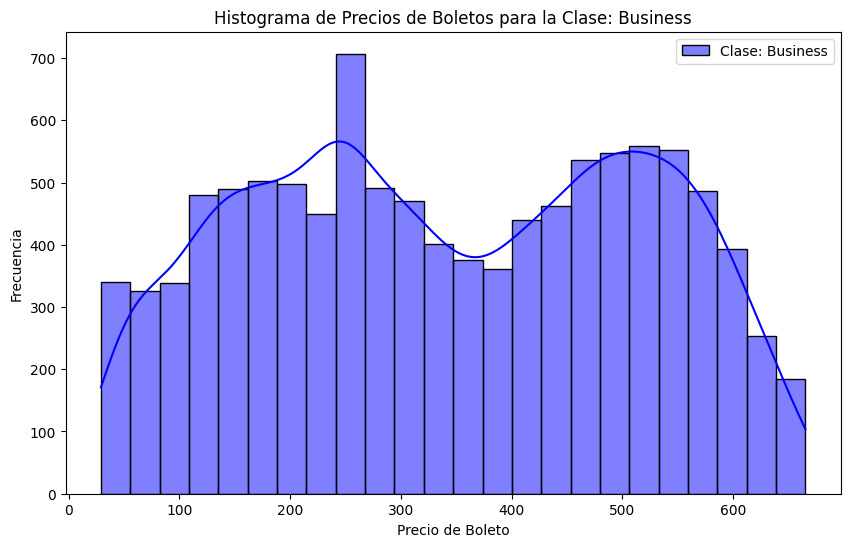

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\4214372579.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




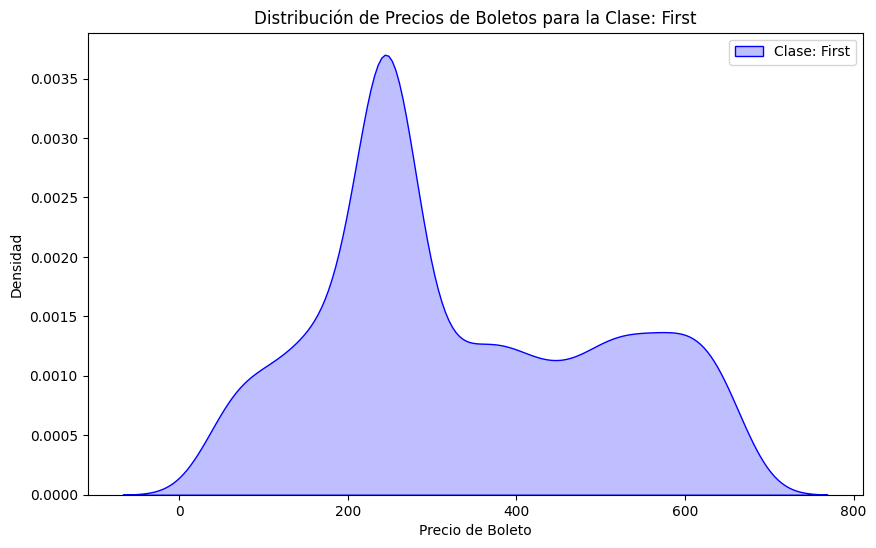

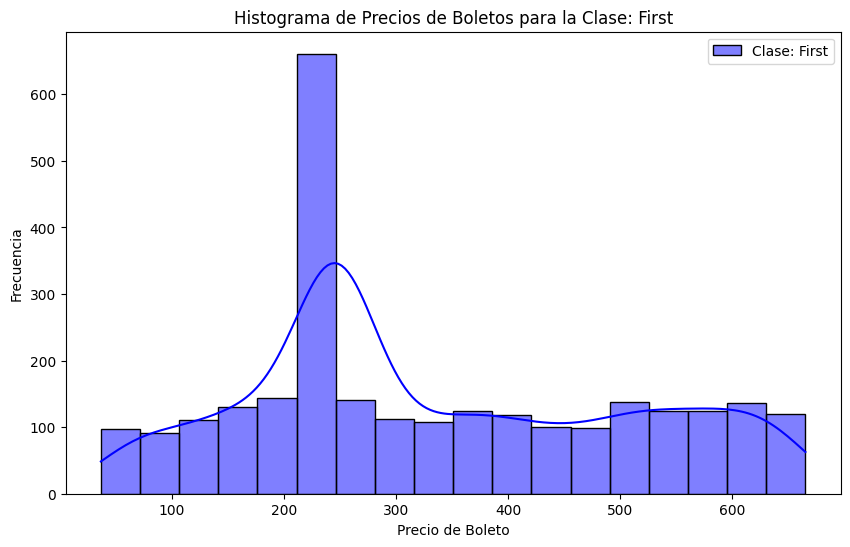

C:\Users\ASUS VIVOBOOK PRO\AppData\Local\Temp\ipykernel_24476\4214372579.py:40: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



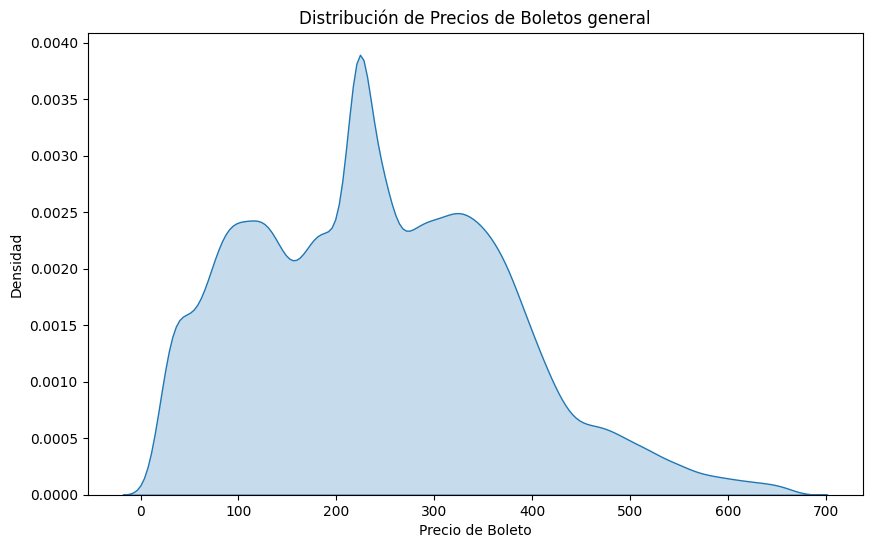

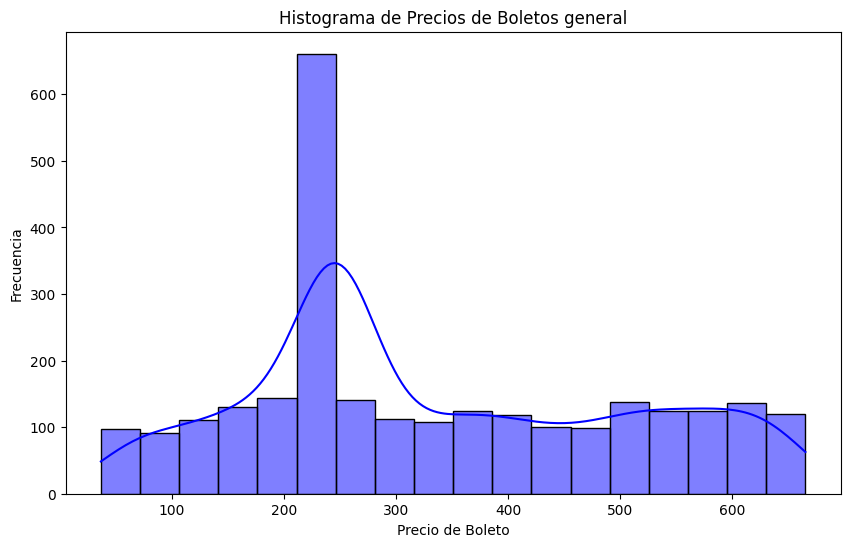

In [35]:
# Crear una lista de las clases únicas
clases_unicas = df['clase'].unique()

# Configurar la visualización
plt.figure(figsize=(12, 8))

# Loop para crear un gráfico para cada clase
for clase in clases_unicas:
    plt.figure(figsize=(10, 6))
    
    # Filtrar los datos para la clase específica
    df_clase = df[df['clase'] == clase]
    
    # Crear un gráfico de densidad para cada clase
    sns.kdeplot(df_clase['Precio_boleto'], shade=True, label=f'Clase: {clase}', color='blue')
    
    # Títulos y etiquetas
    plt.title(f'Distribución de Precios de Boletos para la Clase: {clase}')
    plt.xlabel('Precio de Boleto')
    plt.ylabel('Densidad')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

    # Alternativa: Histograma por clase
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clase['Precio_boleto'], kde=True, color='blue', label=f'Clase: {clase}')
    
    # Títulos y etiquetas
    plt.title(f'Histograma de Precios de Boletos para la Clase: {clase}')
    plt.xlabel('Precio de Boleto')
    plt.ylabel('Frecuencia')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Precio_boleto', fill=True, common_norm=False, palette="crest")
plt.title(f'Distribución de Precios de Boletos general')
plt.xlabel('Precio de Boleto')
plt.ylabel('Densidad')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_clase['Precio_boleto'], kde=True, color='blue')
plt.title(f'Histograma de Precios de Boletos general')
plt.xlabel('Precio de Boleto')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
df['Precio_boleto'].isnull().sum() 

np.int64(0)

In [37]:
df[['clase','genero','tipo_pago','aerolinea']]

clase genero        tipo_pago     aerolinea
0        Economy      M  Tarjeta Credito   Aerolinea_1
1        Economy      F  Tarjeta Credito   Aerolinea_3
2        Premium      F  Tarjeta Credito   Aerolinea_5
3        Economy      F  Tarjeta Credito  Aerolinea_10
4        Economy      M  Tarjeta Credito   Aerolinea_8
...          ...    ...              ...           ...
133282   Economy      M  Tarjeta Credito   Aerolinea_8
133283  Business      M     Canje Millas   Aerolinea_8
133284   Premium      M  Tarjeta Credito   Aerolinea_8
133285  Business      F  Tarjeta Credito   Aerolinea_6
133286   Economy      F   Tarjeta Debito   Aerolinea_9

[133287 rows x 4 columns]

In [38]:
columnas = ['clase','genero','tipo_pago','aerolinea']
for columna in columnas:
    print(f"Valores únicos en la columna '{columna}':")
    print(df[columna].unique())
    print()

Valores únicos en la columna 'clase':
['Economy' 'Premium' 'Business' 'First']

Valores únicos en la columna 'genero':
['M' 'F']

Valores únicos en la columna 'tipo_pago':
['Tarjeta Credito' 'Canje Millas' 'Efectivo' 'Tarjeta Debito']

Valores únicos en la columna 'aerolinea':
['Aerolinea_1' 'Aerolinea_3' 'Aerolinea_5' 'Aerolinea_10' 'Aerolinea_8'
 'Aerolinea_4' 'Aerolinea_7' 'Aerolinea_6' 'Aerolinea_2' 'Aerolinea_9']



A la columna clase le hariamos un ordinal encoder, debido a que representa una variable cualitativa ordinal.
Por otro lado, a las otras columnas debido a su naturaleza nominal le hariamos un one hot encoding.

In [39]:
from sklearn.preprocessing import OrdinalEncoder
clase_ordenadas = ['Economy', 'Premium', 'Business', 'First']
ordinal_encoder = OrdinalEncoder(categories=[clase_ordenadas])
df['clase_codificada'] = ordinal_encoder.fit_transform(df[['clase']])
df

identificacionPasajero  ID vuelo asiento     clase  Precio_boleto  \
0                       178527       176     10F   Economy     223.101586   
1                        60548       134     36F   Economy     156.250305   
2                       124289       336      9D   Premium     243.827387   
3                       125115       429     15D   Economy     385.355754   
4                        39485       518     17B   Economy     129.551739   
...                        ...       ...     ...       ...            ...   
133282                     378       717      8A   Economy     292.568470   
133283                   48402        70     23E  Business      77.327654   
133284                   67343       372     33C   Premium     107.389897   
133285                  195358       212     42A  Business     300.507295   
133286                   76837       737      1D   Economy     234.029325   

       fecha_compra genero        tipo_pago fecha_vuelo     aerolinea origin  \
0        2022-10-10      M  Tarjeta Credito  2023-03-21   Aerolinea_1    MIA   
1        2022-11-29      F  Tarjeta Credito  2023-03-02   Aerolinea_3    CUE   
2        2023-01-09      F  Tarjeta Credito  2023-06-02   Aerolinea_5    MIA   
3        2023-01-29      F  Tarjeta Credito  2023-07-14  Aerolinea_10    CUE   
4        2023-06-03      M  Tarjeta Credito  2023-08-24   Aerolinea_8    UIO   
...             ...    ...              ...         ...           ...    ...   
133282   2023-06-10      M  Tarjeta Credito  2023-11-23   Aerolinea_8    UIO   
133283   2023-01-11      M     Canje Millas  2023-02-01   Aerolinea_8    CUE   
133284   2023-06-13      M  Tarjeta Credito  2023-06-19   Aerolinea_8    UIO   
133285   2023-03-23      F  Tarjeta Credito  2023-04-07   Aerolinea_6    JFK   
133286   2023-08-27      F   Tarjeta Debito  2023-12-02   Aerolinea_9    MIA   

       dest  dep_delay  Año_vuelo dia_semana  clase_codificada  
0       MAD       43.0       2023    Tuesday               0.0  
1       MIA       44.0       2023   Thursday               0.0  
2       MAD       13.0       2023     Friday               1.0  
3       MAD        1.0       2023     Friday               0.0  
4       JFK       42.0       2023   Thursday               0.0  
...     ...        ...        ...        ...               ...  
133282  MIA       10.0       2023   Thursday               0.0  
133283  MIA       46.0       2023  Wednesday               2.0  
133284  MAD        3.0       2023     Monday               1.0  
133285  MIA       36.0       2023     Friday               2.0  
133286  MAD       27.0       2023   Saturday               0.0  

[133287 rows x 16 columns]

**Agrupar las que tienen pocos valores mediante la categoria otros**

In [40]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
columnas_nominales = ['genero', 'tipo_pago', 'aerolinea']
df_onehot = pd.DataFrame(onehot_encoder.fit_transform(df[columnas_nominales]),
                         columns=onehot_encoder.get_feature_names_out(columnas_nominales))
df_final = pd.concat([df, df_onehot], axis=1)
df_final

identificacionPasajero  ID vuelo asiento     clase  Precio_boleto  \
0                       178527       176     10F   Economy     223.101586   
1                        60548       134     36F   Economy     156.250305   
2                       124289       336      9D   Premium     243.827387   
3                       125115       429     15D   Economy     385.355754   
4                        39485       518     17B   Economy     129.551739   
...                        ...       ...     ...       ...            ...   
133282                     378       717      8A   Economy     292.568470   
133283                   48402        70     23E  Business      77.327654   
133284                   67343       372     33C   Premium     107.389897   
133285                  195358       212     42A  Business     300.507295   
133286                   76837       737      1D   Economy     234.029325   

       fecha_compra genero        tipo_pago fecha_vuelo     aerolinea  ...  \
0        2022-10-10      M  Tarjeta Credito  2023-03-21   Aerolinea_1  ...   
1        2022-11-29      F  Tarjeta Credito  2023-03-02   Aerolinea_3  ...   
2        2023-01-09      F  Tarjeta Credito  2023-06-02   Aerolinea_5  ...   
3        2023-01-29      F  Tarjeta Credito  2023-07-14  Aerolinea_10  ...   
4        2023-06-03      M  Tarjeta Credito  2023-08-24   Aerolinea_8  ...   
...             ...    ...              ...         ...           ...  ...   
133282   2023-06-10      M  Tarjeta Credito  2023-11-23   Aerolinea_8  ...   
133283   2023-01-11      M     Canje Millas  2023-02-01   Aerolinea_8  ...   
133284   2023-06-13      M  Tarjeta Credito  2023-06-19   Aerolinea_8  ...   
133285   2023-03-23      F  Tarjeta Credito  2023-04-07   Aerolinea_6  ...   
133286   2023-08-27      F   Tarjeta Debito  2023-12-02   Aerolinea_9  ...   

       aerolinea_Aerolinea_1 aerolinea_Aerolinea_10  aerolinea_Aerolinea_2  \
0                        1.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    1.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
133282                   0.0                    0.0                    0.0   
133283                   0.0                    0.0                    0.0   
133284                   0.0                    0.0                    0.0   
133285                   0.0                    0.0                    0.0   
133286                   0.0                    0.0                    0.0   

        aerolinea_Aerolinea_3 aerolinea_Aerolinea_4  aerolinea_Aerolinea_5  \
0                         0.0                   0.0                    0.0   
1                         1.0                   0.0                    0.0   
2                         0.0                   0.0                    1.0   
3                         0.0                   0.0                    0.0   
4                         0.0                   0.0                    0.0   
...                       ...                   ...                    ...   
133282                    0.0                   0.0                    0.0   
133283                    0.0                   0.0                    0.0   
133284                    0.0                   0.0                    0.0   
133285                    0.0                   0.0                    0.0   
133286                    0.0                   0.0                    0.0   

        aerolinea_Aerolinea_6  aerolinea_Aerolinea_7  aerolinea_Aerolinea_8  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                         0.0      